## Gussian Navie Bayes Project - Titanic 


#### importing libraries 

In [281]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
 

In [282]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [283]:
#option: import warnings 
#warnings.filterwarnings("ignore")

### loading dataset 

In [284]:
df = pd.read_csv(r'C:\Users\Aditi k\OneDrive\Desktop\aditi\courses\ML HCF notes\train.csv')

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [286]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [287]:
print("Shape:", df.shape)

Shape: (891, 12)


In [288]:
print("Columns:", df.columns.tolist())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [289]:
print("Missing values:\n",df.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [290]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### EDA

In [291]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\Aditi k\AppData\Local\Temp\ipykernel_19044\3617262638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='Set1')


<Axes: xlabel='Survived', ylabel='count'>

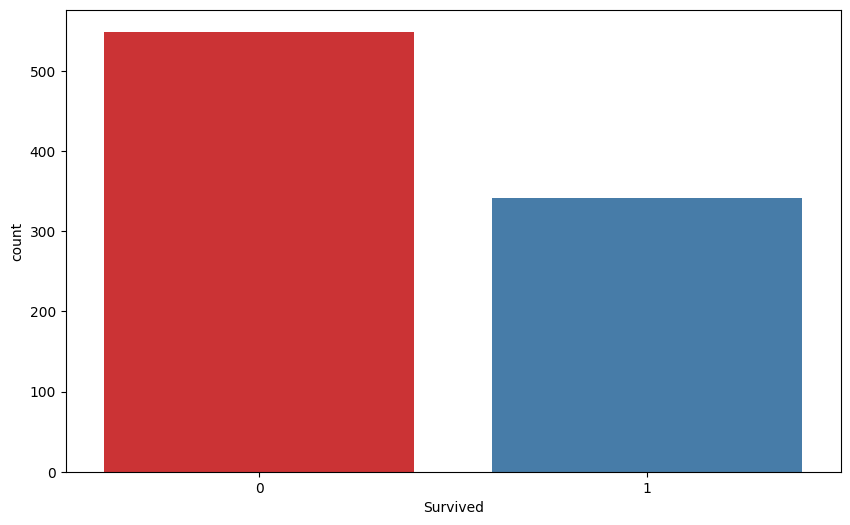

In [292]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=df,palette='Set1')

<Axes: xlabel='Sex', ylabel='count'>

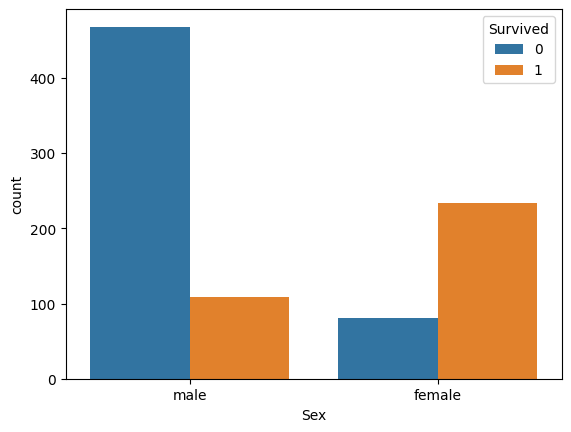

In [293]:
sns.countplot(x='Sex', hue='Survived',data=df)

<Axes: xlabel='Age', ylabel='Count'>

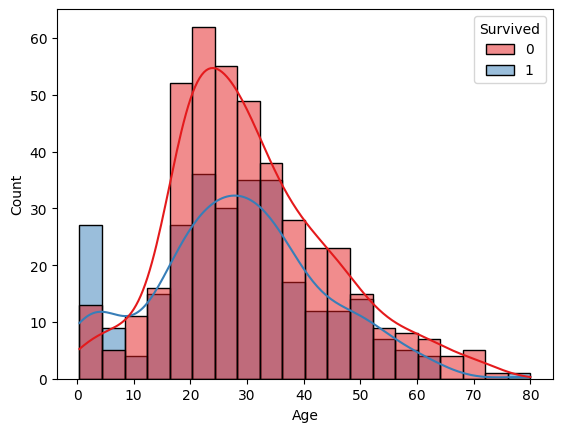

In [294]:
sns.histplot(x='Age', hue='Survived', data=df, kde=True, palette='Set1') 

# Data preprocessing

In [295]:
#drop nul values before encoding 

In [296]:
df.fillna({'Age':df['Age'].mean(),
           'Embarked':df['Embarked'].mode},inplace=True)

In [297]:
df.Embarked.value_counts()

Embarked
S                                                                                                                                                                                         644
C                                                                                                                                                                                         168
Q                                                                                                                                                                                          77
<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>      2
Name: count, dtype: int64

In [298]:
# dropping colums tht are not useful for prediction 
df.drop(['PassengerId','Name','Ticket','Cabin', 'Age'], axis=1,inplace=True)


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [300]:
df.Embarked.value_counts()

Embarked
S                                                                                                                                                                                         644
C                                                                                                                                                                                         168
Q                                                                                                                                                                                          77
<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>      2
Name: count, dtype: int64

In [301]:
df['Embarked']=df['Embarked'].map({'C':0,'Q':1,'S':2})

In [302]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [303]:
df.Embarked.value_counts()

Embarked
2.0    644
0.0    168
1.0     77
Name: count, dtype: int64

In [304]:
df.Sex.value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

<Axes: >

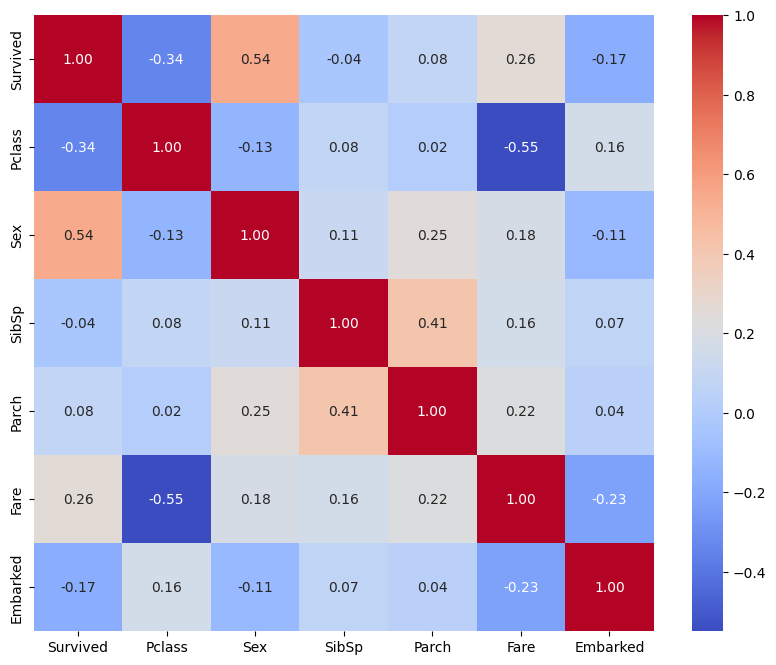

In [305]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(data=corr, annot=True, fmt='.2f',cmap='coolwarm')

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [307]:
df.fillna(0,inplace=True)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [309]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [310]:

X=df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model= GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [311]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.776536312849162


In [312]:
cm=confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n", cm)

confusion_matrix:
 [[82 23]
 [17 57]]


Text(0.5, 1.0, 'Confusion matrix')

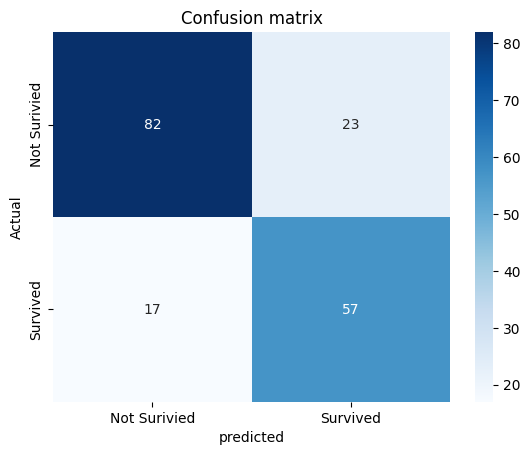

In [313]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Surivied','Survived'], yticklabels=['Not Surivied','Survived'] )
plt.xlabel('predicted')
plt.ylabel("Actual")
plt.title('Confusion matrix')

In [314]:
report= classification_report(y_test,y_pred)
print("classification report:\n",report)

classification report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [315]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,2.0
1,1,1,1,1,0,71.2833,0.0
2,1,3,1,0,0,7.9250,2.0
3,1,1,1,1,0,53.1000,2.0
4,0,3,0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,2.0
887,1,1,1,0,0,30.0000,2.0
888,0,3,1,1,2,23.4500,2.0
889,1,1,0,0,0,30.0000,0.0


In [316]:
df.Fare 


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [317]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,7.2500,2.0
1,1,1,1,0,71.2833,0.0
2,3,1,0,0,7.9250,2.0
3,1,1,1,0,53.1000,2.0
4,3,0,0,0,8.0500,2.0
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,2.0
887,1,1,0,0,30.0000,2.0
888,3,1,1,2,23.4500,2.0
889,1,0,0,0,30.0000,0.0
